In [14]:
# 2 key libraries: geopandas and PySAL. 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

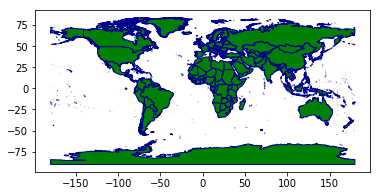

In [15]:
gpkg_src = 'https://bit.ly/2K4JcsB'
world = gpd.read_file(gpkg_src)
world.plot(facecolor='green', edgecolor='darkblue')

In [16]:
world.to_file('../data/w6-geopandas/world.gpkg', driver='GPKG') 
# drivers are necessary for anything except ESRI shape files 
world.to_file('../data/w6-geopandas/world.shp') # driver ='ESRI Shapefile' -- not necessary
world.to_file('../data/w6-geopandas/world.geojson', driver='GeoJSON')

In [17]:
print(isinstance(world,str))
print(isinstance(world, gpd.GeoDataFrame))
print(isinstance(world, pd.DataFrame))

False
True
True


In [18]:
print(isinstance(world.geometry, str))
print(isinstance(world.geometry, pd.Series))
print(isinstance(world.geometry, gpd.GeoSeries))

False
True
True


In [19]:
print(world.crs) # projection information is attached to the geodataframe

epsg:4326


In [20]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

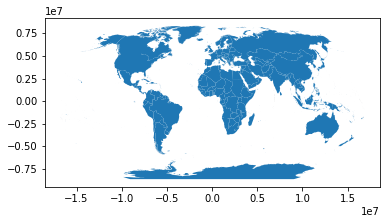

In [21]:
# converting dataframes from one prjection to another
world2=world.to_crs('ESRI:54030') # reprojecting into an elipsoid 
world2.plot()

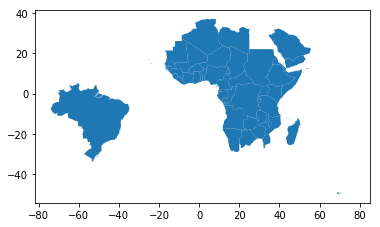

In [22]:
wslice=world.cx[-50:50, -20:20] 
# clipping a portion of the map that INTERSECTS with these coordinate refererneces 
ax = wslice.plot()

In [23]:
wslice = world2.cx[-1*scale:-0.5*scale, 0.0:2.5*scale/10]

NameError: name 'scale' is not defined

In [ ]:
scale=float('1e7')


In [13]:
f.ax=plt.subplots(figsize=(20,10))  # always gives you back access objects 
wslice.plot(ax=ax[0])
wslice.geometry.centroid.plot(ax=ax[0], markersize=20, color='red')
wslice.geometry.centroid.plot(ax=ax[1], markersize=20, color='red')
ax[0]=set_xlim([-1.5+1e7:0,0]) # setting the range to have a limited area of the map to display
ax[1].set_ylim[-2*scale/10, 4+scale/10]

NameError: name 'plt' is not defined

In [ ]:
'''geoSeries have attributes like any other series but include some spatially specific ones:
1. area - if a polygon
2. bounds - for each feature
3. total_bounds - for each GeoSeries
4. geom_type - if you dont already know the type 
5. is_valid - if you need to test 

distance() - returns a series measuring distnaceds to some other feature 
centroid - returns geoseries of strict centroids (called as: <GeoSeries>.centroid)
representative_point() - returns GeoSeries of points within features 
to_crs() and plot()

geoom_almost_equals()
 tries to deal with rounding isues when comparing two features
 contains() is a shape contained within some other feature
 intersects() - does shape intersect some other feature 
'''

In [24]:
# rather than intersects, creating bounding boxes

bbox = 'POLYGON((5000000.0 2500000.0, 5000000.0 -2500000.0, -5000000.0 -2500000.0, -5000000.0 2500000.0, 5000000.0 2500000.0))'

from shapely import wkt
bgdf = gpd.GeoDataFrame(
                {'id':[0], 'coordinates':bbox})
bgdf['geometry'] = bgdf.coordinates.apply(wkt.loads) 
# apply means take every row in this data set and apply this function 
bgdf = bgdf.set_crs('ESRI:54030')

(-3000000.0, 3000000.0)

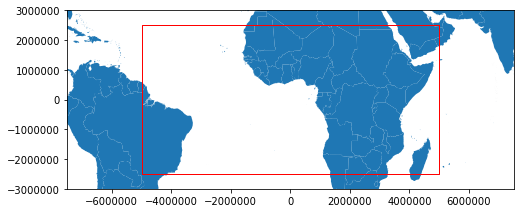

In [25]:
scale = int(float('1e7'))
f,ax=plt.subplots(figsize=(8,4))
world2.plot(ax=ax)
bgdf.plot(ax=ax, color='none', edgecolor='r')
ax.set_xlim([-0.75*scale, +0.75*scale])
ax.set_ylim([-3*scale/10, +3*scale/10])

In [ ]:
url = 'https://bit.ly/3owocdI'
df = pd.read_csv(url)

gdf= gpd.GeoDataFrame(df,
                     geometry=gpd.points_from_xy(
                             df['longitude'],
                             df['latitude'],
                             crs='epsg:4326'
                     )
                    )
gdf.plot()

In [26]:
# reference https://darribas.org/gds_course/content/home.html
pwd

NameError: name 'pwd' is not defined

In [32]:
df = pd.read_csv('../data/src/2019-sample-Crime.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    100 non-null    int64  
 1   Case Number           100 non-null    object 
 2   Date                  100 non-null    object 
 3   Primary Type          100 non-null    object 
 4   Description           100 non-null    object 
 5   Location Description  97 non-null     object 
 6   Arrest                100 non-null    bool   
 7   Domestic              100 non-null    bool   
 8   Year                  100 non-null    int64  
 9   Latitude              100 non-null    float64
 10  Longitude             100 non-null    float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 7.4+ KB


In [34]:
df['Primary Type'].unique()

array(['BURGLARY', 'DECEPTIVE PRACTICE', 'BATTERY', 'THEFT', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'ASSAULT', 'OTHER OFFENSE', 'STALKING',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'INTERFERENCE WITH PUBLIC OFFICER'], dtype=object)

In [ ]:
gdf - gpd.GeoDataFrame